In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import timeit
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 100
niters = 1000
t_dist = Rosenbrock()

##### Not using ensemble, use isotropic gaussian proposal with scale=0.2

finishes in about 0.48 seconds
avg accept rate: 62.87%


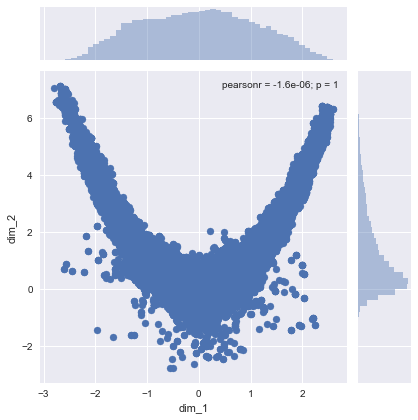

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), verbose=False)
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

#### Use ensemble of size 3, scale=0.2. Ensemble seems to be making the acceptance prob extremely high.

finishes in about 0.79 seconds
avg accept rate: 53.43%


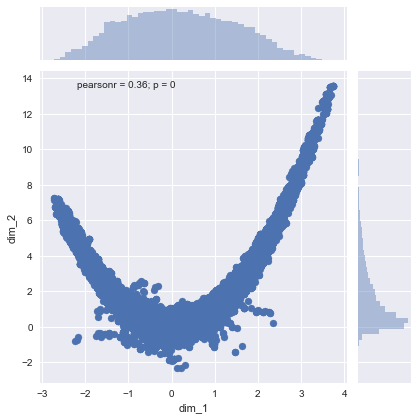

In [4]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

#### Ensemble with pCN, beta=0.2  
This could come from the theory behind pCN sampling, i.e. it preserves the underlying Gaussian measure.

finishes in about 0.86 seconds
avg accept rate: 93.35%


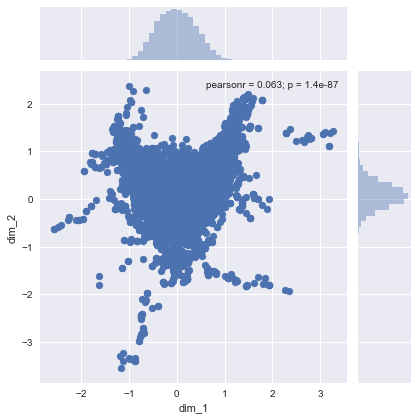

In [5]:
proposal = PCNWalkMove(s=3, beta=0.15)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

#### pCN without ensemble, beta=0.2  
Check affine invariance of pCN.

finishes in about 0.49 seconds
avg accept rate: 53.89%


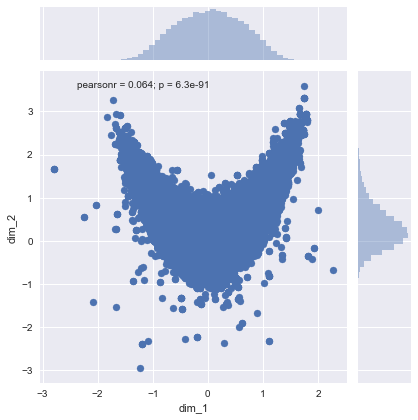

In [6]:
proposal = PCNWalkMove(s=None, beta=0.4)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

#### Ensemble with pCN, start from the end position of isotropic gaussian proposal

In [7]:
niter = 10
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
p0 = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True).curr_pos

finishes in about 0.89 seconds
avg accept rate: 88.73%


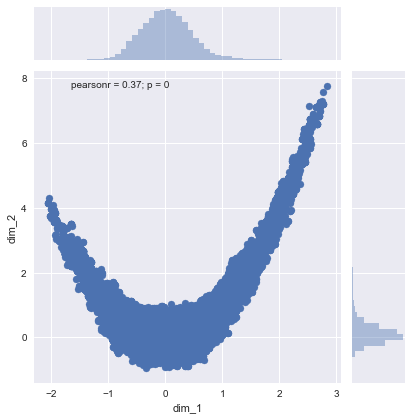

In [8]:
sampler.reset()
sampler.proposal.s = 3
sampler.proposal.beta = 0.2

start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=p0, store=True)
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)

hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')